# Exploratory Data Analysis Starter

## Import packages

In [1]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import numpy as np


# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. 

In [2]:
# loading cient's data
client_df = pd.read_csv('./../data/client_data.csv')

# loading price data
price_df = pd.read_csv('./../data/price_data.csv')

We will view the first 5 and the last 5 rows of each dataframe to make sure everything loaded correctly.

In [3]:
client_df.head(5)


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [4]:
client_df.tail(5)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0
14605,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,f,0.00,11.84,11.84,1,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392,0


In [5]:
price_df.head(5)



,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [6]:
price_df.tail(5)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193001,16f51cdc2baa19af0b940ee1b3dd17d5,2015-12-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [7]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

> - The type of columns are good and we don't need to change anything.

> - There is no missing data.

In [8]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


> The same can be said for the price data

### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [9]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [10]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


---

## Data visualization



### A. Categorical variables

We will first inspect the categorical variables in the dataset.

/tmp/ipykernel_10562/168245827.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_counts['churn'] = cat_counts['churn'].replace({0: 'not churn', 1: 'churn'})
/tmp/ipykernel_10562/168245827.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_counts['has_gas'] = cat_counts['has_gas'].replace({'f': 'no gas', 't': 'has gas'})


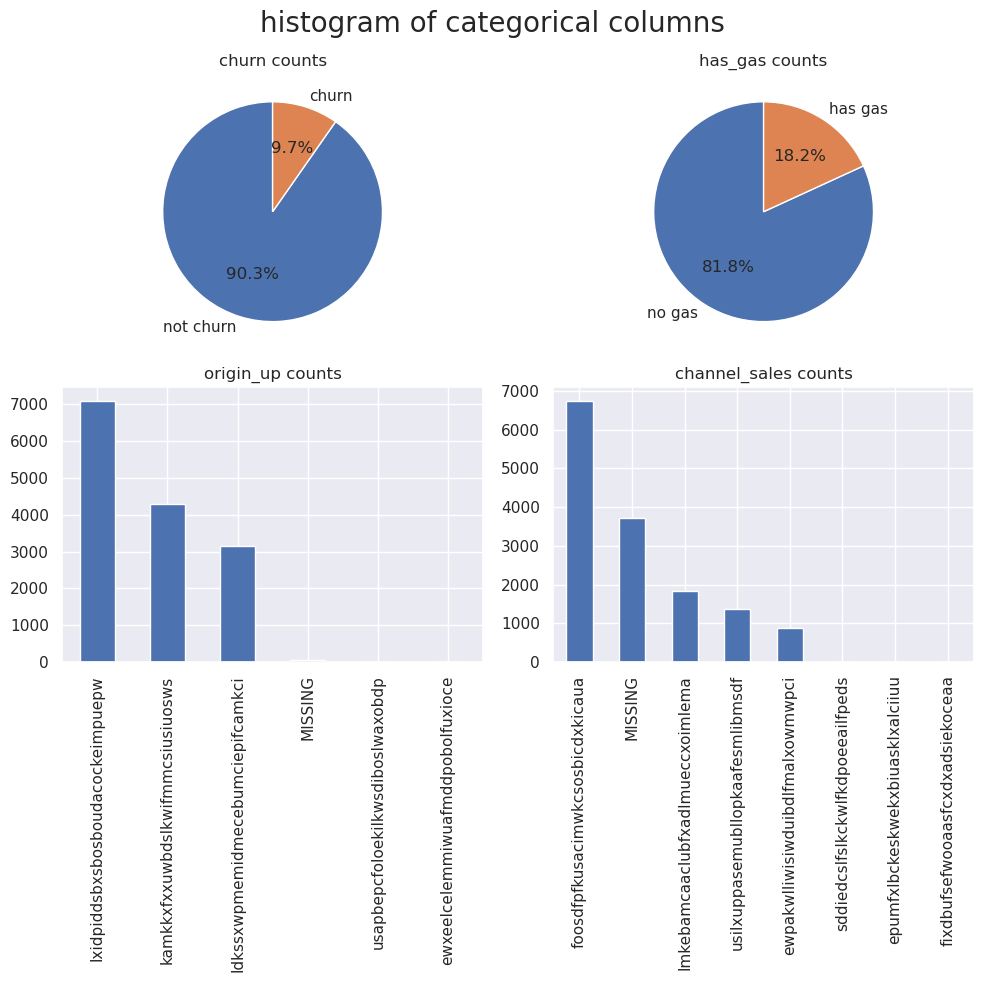

In [11]:
cat_counts = client_df[['churn', 'has_gas', 'origin_up', 'channel_sales']]

# replace values of churn with churn not churn

cat_counts['churn'] = cat_counts['churn'].replace({0: 'not churn', 1: 'churn'})

cat_counts['has_gas'] = cat_counts['has_gas'].replace({'f': 'no gas', 't': 'has gas'})


figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

for i, cons in enumerate(['churn', 'has_gas']):

    cat_counts[cons].value_counts().plot(kind='pie', ax=axes[i//2, i%2],autopct='%1.1f%%', startangle=90)

    # delete labels
    axes[i//2, i%2].set_ylabel('')

    axes[i//2, i%2].set_xlabel('')

    # column title

    axes[i//2, i%2].set_title(cons+' counts')



for i, cons in enumerate(['origin_up', 'channel_sales']):

    j = i + 2

    cat_counts[cons].value_counts().plot(kind='bar', ax=axes[j//2, j%2])

    # column title

    axes[j//2, j%2].set_title(cons+' counts')

plt.suptitle('histogram of categorical columns', fontsize=20)

plt.tight_layout()

plt.show()

> We observe that:

> - We observe that a substantial 9.7% of the clients have churned. This is a significant number and has the potential to significantly impact the company's revenue.

> - It's notable that a majority of the companies have no gas consumption. This suggests that electricity usage is more likely to have an impact on churn.

> - There appears to be a dominant sales channel in use. This could indicate that the company's efforts in this channel are effective or that there's room for diversification.

> - A significant portion of clients comes from another energy distributor. This suggests that clients in this market segment might be more willing to change their energy distributor if they are not satisfied with the service, making it essential to focus on customer satisfaction and retention.

Now we will try to inspect the effect of forecasted prices on churn.

In [12]:
def stack_proportional(df, column, ax=None, title='none'):

    if ax is None:

        ax = plt.gca()

    cat_count = df.groupby([column, 'churn']).size().reset_index().pivot(columns='churn', index=column, values=0)

    cat_count = cat_count.div(cat_count.sum(axis=1), axis=0)

    cat_count.plot(kind='bar', stacked=True, ax=ax)

    ax.set_title(title)

    ax.set_ylabel('Proportion')

    ax.set_xlabel(column)


    ax.tick_params(axis='x', rotation=90)

    ax.tick_params(axis='y', rotation=0)

    



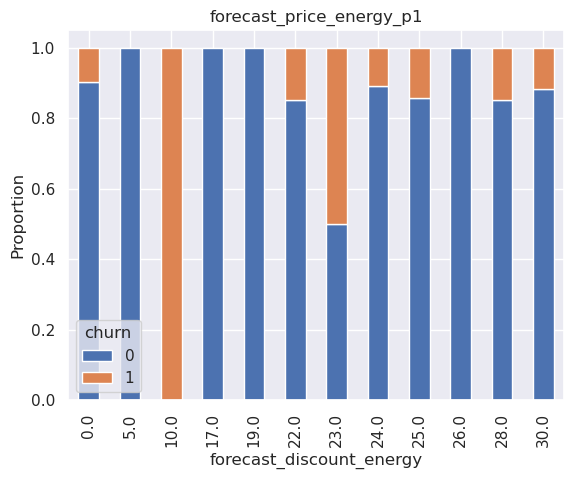

In [13]:
stack_proportional(client_df, 'forecast_discount_energy', ax=plt.gca(), title='forecast_price_energy_p1')

> - We observe that the ditribution of churned and non-churned clients is random across the different price categories. This suggests that the forecasted prices alone are not a good predictor of churn.

We now do the same thing for the chanel sale and origin.

/tmp/ipykernel_10562/3540671282.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_counts['churn'] = cat_counts['churn'].replace({0: 'not churn', 1: 'churn'})
/tmp/ipykernel_10562/3540671282.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_counts['has_gas'] = cat_counts['has_gas'].replace({'f': 'no gas', 't': 'has gas'})


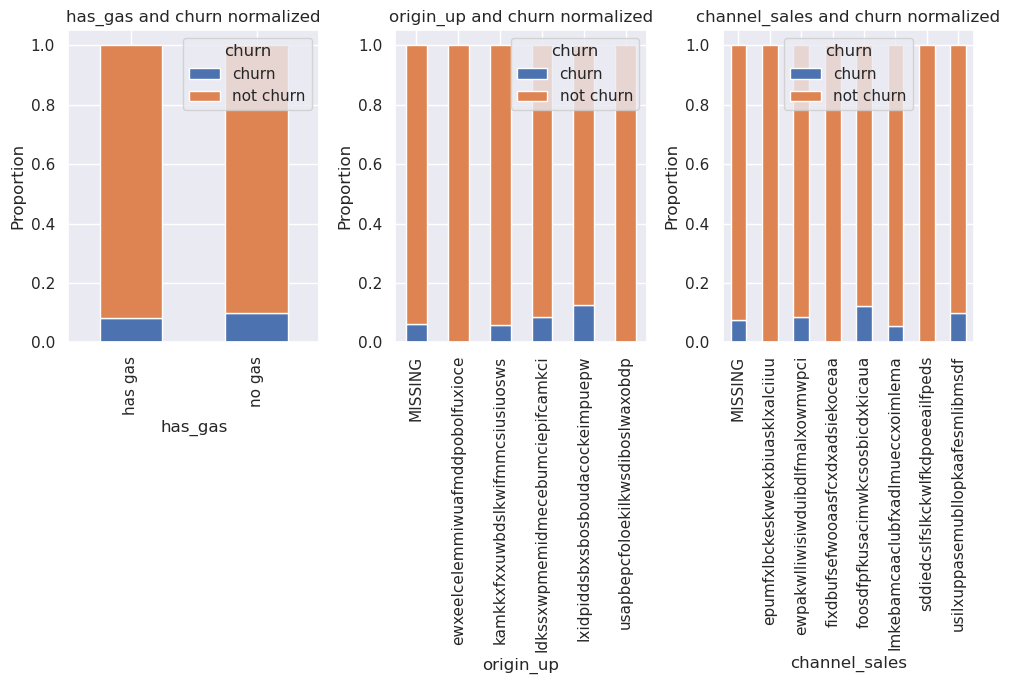

In [14]:
# stack bar plot has gas and churn normalized

cat_counts = client_df[['churn', 'has_gas', 'origin_up', 'channel_sales']]

cat_counts['churn'] = cat_counts['churn'].replace({0: 'not churn', 1: 'churn'})

cat_counts['has_gas'] = cat_counts['has_gas'].replace({'f': 'no gas', 't': 'has gas'})

# 3 subplots

figure, axes = plt.subplots(1, 3, figsize=(10,7))

for i, cons in enumerate(['has_gas', 'origin_up', 'channel_sales']):

    stack_proportional(cat_counts, cons, axes[i], cons+' and churn normalized')

plt.tight_layout()

plt.show()



> - We conclude that the origin and the channel sale are not good predictors of churn, since the distribution of churned and non-churned clients is nearly identical across the different categories, there are some exceptions but this is due to the fact that we have a small sample size for these categories.

In [15]:
pd.crosstab(client_df['churn'], client_df['has_gas'])

has_gas,f,t
churn,,
0,10753,2434
1,1202,217


In [16]:
pd.crosstab(client_df['churn'], client_df['origin_up'])

origin_up,MISSING,ewxeelcelemmiwuafmddpobolfuxioce,kamkkxfxxuwbdslkwifmmcsiusiuosws,ldkssxwpmemidmecebumciepifcamkci,lxidpiddsbxsbosboudacockeimpuepw,usapbepcfoloekilkwsdiboslwaxobdp
churn,,,,,,
0,60,1,4036,2884,6204,2
1,4,0,258,264,893,0


In [17]:
pd.crosstab(client_df['churn'], client_df['channel_sales'])

channel_sales,MISSING,epumfxlbckeskwekxbiuasklxalciiuu,ewpakwlliwisiwduibdlfmalxowmwpci,fixdbufsefwooaasfcxdxadsiekoceaa,foosdfpfkusacimwkcsosbicdxkicaua,lmkebamcaaclubfxadlmueccxoimlema,sddiedcslfslkckwlfkdpoeeailfpeds,usilxuppasemubllopkaafesmlibmsdf
churn,,,,,,,,
0,3442,3,818,2,5934,1740,11,1237
1,283,0,75,0,820,103,0,138


> We observe that there are some chanel sales and origin up to wich we don't have a lot of rows, so we suggest that we will stack them in a single category.

In [18]:



chi2_has_gas, pval_has_gas, dof_has_gas, expected_has_gas = stats.chi2_contingency(pd.crosstab(client_df['churn'], client_df['has_gas']))

chi2_origin_up, pval_origin_up, dof_origin_up, expected_origin_up = stats.chi2_contingency(pd.crosstab(client_df['churn'], client_df['origin_up']))

chi2_channel_sales, pval_channel_sales, dof_channel_sales, expected_channel_sales = stats.chi2_contingency(pd.crosstab(client_df['churn'], client_df['channel_sales']))

print('p-value for has_gas: ', pval_has_gas)

print('p-value for origin_up: ', pval_origin_up)

print('p-value for channel_sales: ', pval_channel_sales)



p-value for has_gas:  0.0036957589641509795
p-value for origin_up:  9.298626414308622e-29
p-value for channel_sales:  1.7810651262162043e-19


> We observe that the p-value is less than 0.05 for all the variables, so we can say that the variables are statistically dependent.

Let's know do the same thing for the antiquity of the client.

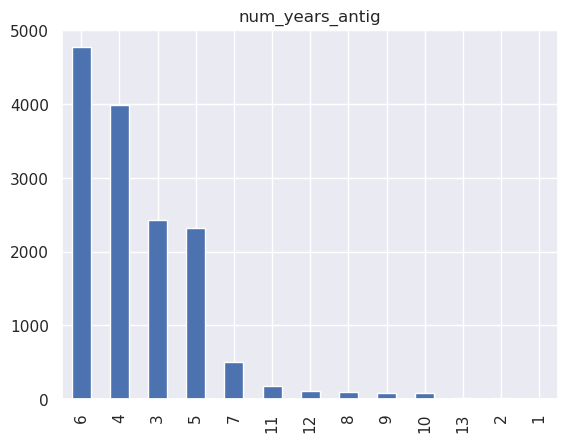

In [19]:
client_df['num_years_antig'].value_counts().plot(kind='bar')

plt.title('num_years_antig')

plt.show()


> We can see that most clients are new clients, and the number of clients decreases as the number of years increases. Which means that the company is losing clients.

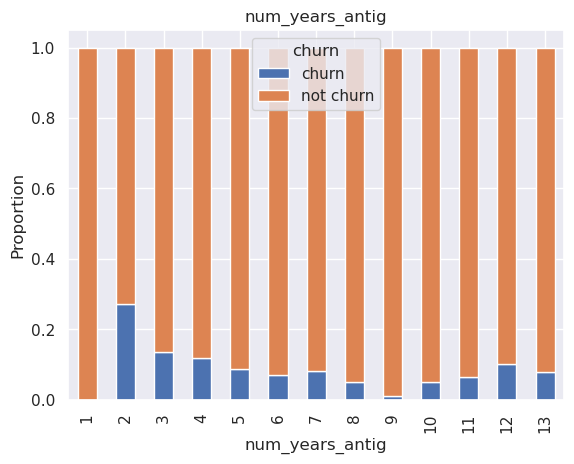

In [20]:
stack_proportional(client_df.replace({'churn': {0: 'not churn', 1: 'churn'}}), 'num_years_antig', title='num_years_antig')

We can't confirm what we've said before since it doesn't seem that the number of years is a good indicator of churn.

### B. Numerical variables

We will now move to numerical data. We will first inspect the distribution of the consumptions.

NameError: name 'consumption_columns' is not defined

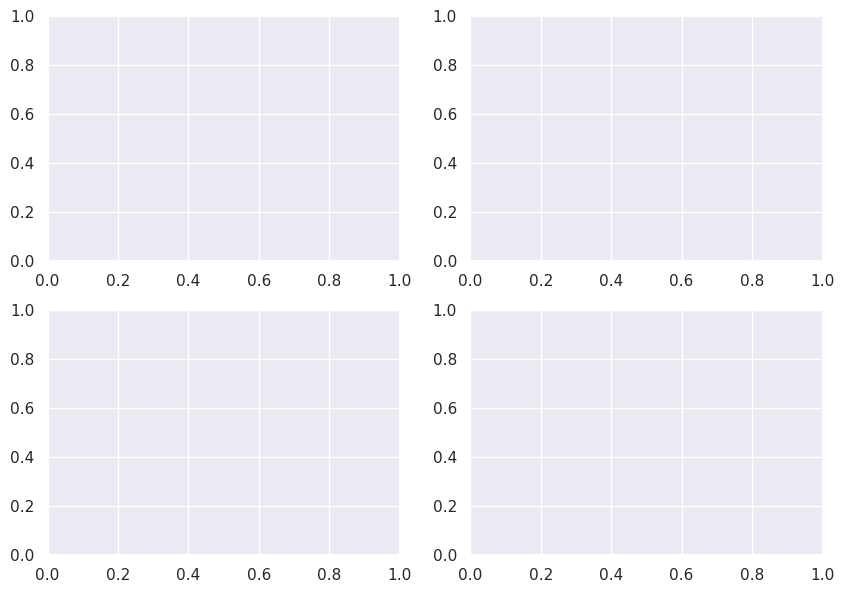

In [21]:
# plot the boxplots of the consumptions columns

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))

for i, cons in enumerate(consumption_columns):

    ax = axs[i//2, i%2]
    box_plot_by_churn(client_df, cons, ax=ax)

plt.suptitle('Boxplot of consumption columns', fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
def plot_hist(dataframe, column, bins_=50, title=''):
    """
    Plot variable distirbution in a histogram
    """
    dataframe[column].hist(bins=bins_)

    plt.suptitle(title)


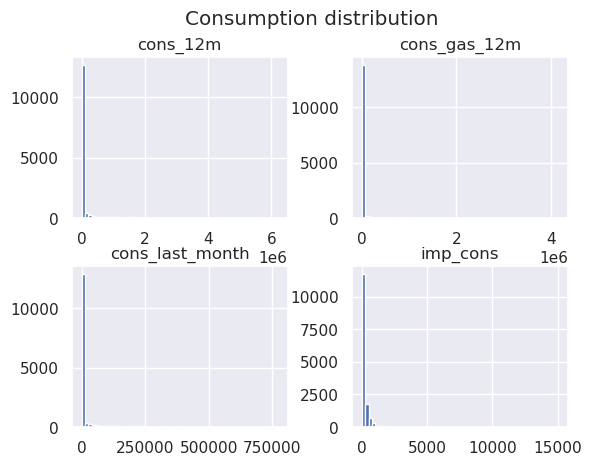

In [ ]:
# Plotting consumption variables

plot_hist(client_df, ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons'], bins_=60, title='Consumption distribution')

> Almost the same distrubution for the consomations, and we observe that the most of the clients have a low consomation. From the statistics table we see that most of cosomations are dense in low values, so we should zoom in to have a good visualization of the distributions.

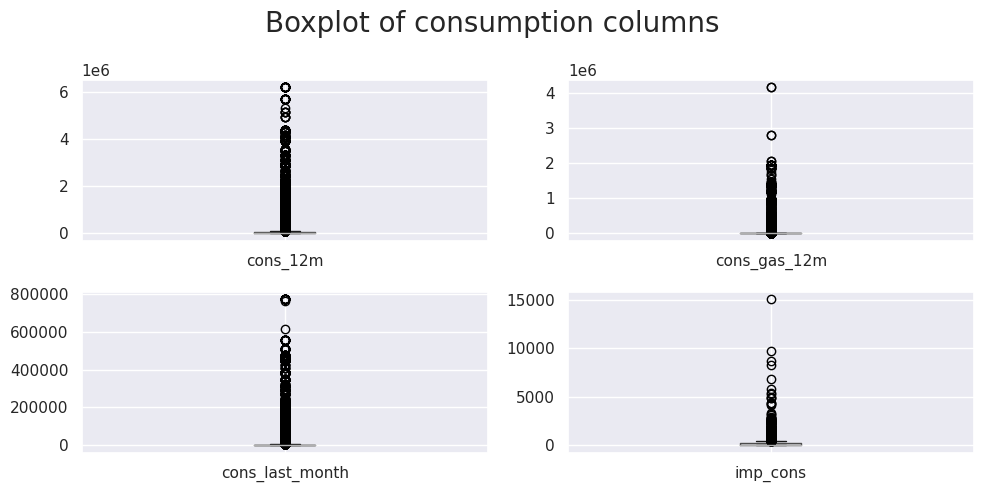

In [ ]:
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
for i, cons in enumerate(['cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons']):
    client_df[[cons]].boxplot(ax=axes[i//2, i%2])
plt.suptitle('Boxplot of consumption columns', fontsize=20)
plt.tight_layout()
plt.show()

1    4660
2     544
3    1584
4    4425
5    8302
Name: cons_12m, dtype: int64
71     14693
87        43
111    14289
113      277
120     7913
Name: cons_gas_12m, dtype: int64
4      526
5     1998
7     1260
9     2188
10    3112
Name: cons_last_month, dtype: int64
4      52.32
5     181.21
7      70.63
9     219.59
10    349.48
Name: imp_cons, dtype: float64


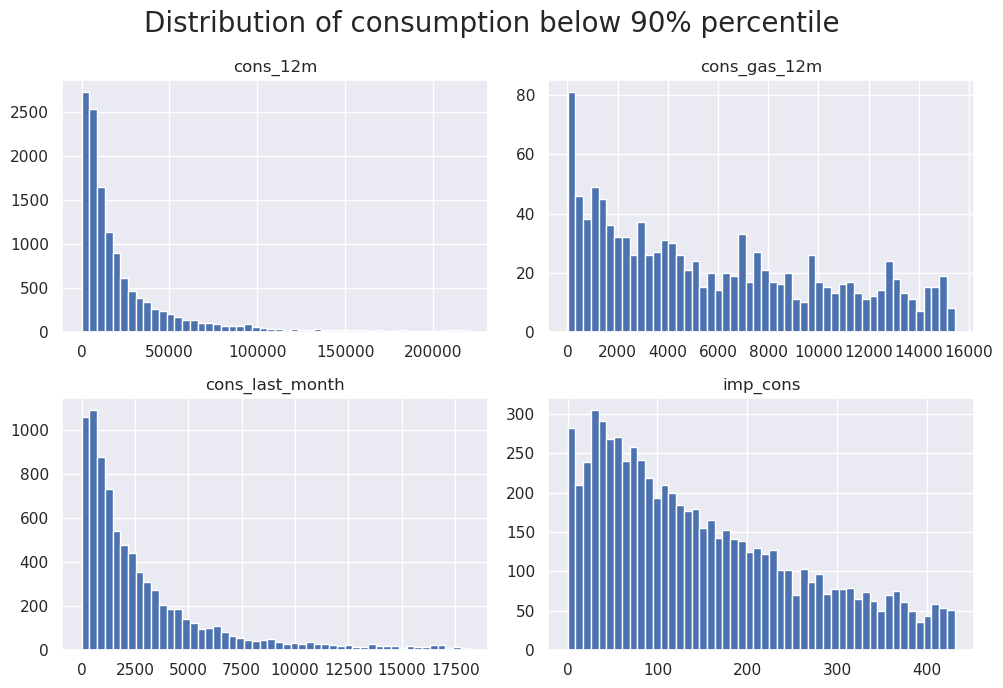

In [ ]:
consumption_columns = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons']
thresholds = [client_df[cons].quantile(0.9) for cons in consumption_columns]
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
temp_series = []
for i, cons in enumerate(consumption_columns):
    temp_serie = client_df[(client_df[cons] < thresholds[i]) & (client_df[cons] > 0)].loc[:, cons]
    print(temp_serie.head())
    temp_serie.hist(ax=axes[i//2, i%2], bins=50)
    axes[i//2, i%2].set_title(cons)
    temp_series.append(temp_serie)

plt.suptitle('Distribution of consumption below 90% percentile', fontsize=20)
plt.tight_layout()
plt.show()

Even after zooming in, we still have a high density of values in the lower values of consumption, and a large tail at the right with the high values.

In [ ]:
def churn_comprison(dataframe, column, ax=None):
    """
    Plot variable distirbution in a histogram
    """

    if ax is None:
        ax = plt.gca()
    sns.histplot(x=dataframe.loc[dataframe['churn']==0][column], stat='density', element='poly', label='No Churn', ax=ax, bins = 30)
    sns.histplot(x=dataframe.loc[dataframe['churn']==1][column], stat='density', element='poly', label='Churn', ax=ax, bins = 30)
    ax.set_xlabel(column)
    ax.legend()
    ax.set_title('Distribution of {}'.format(column))

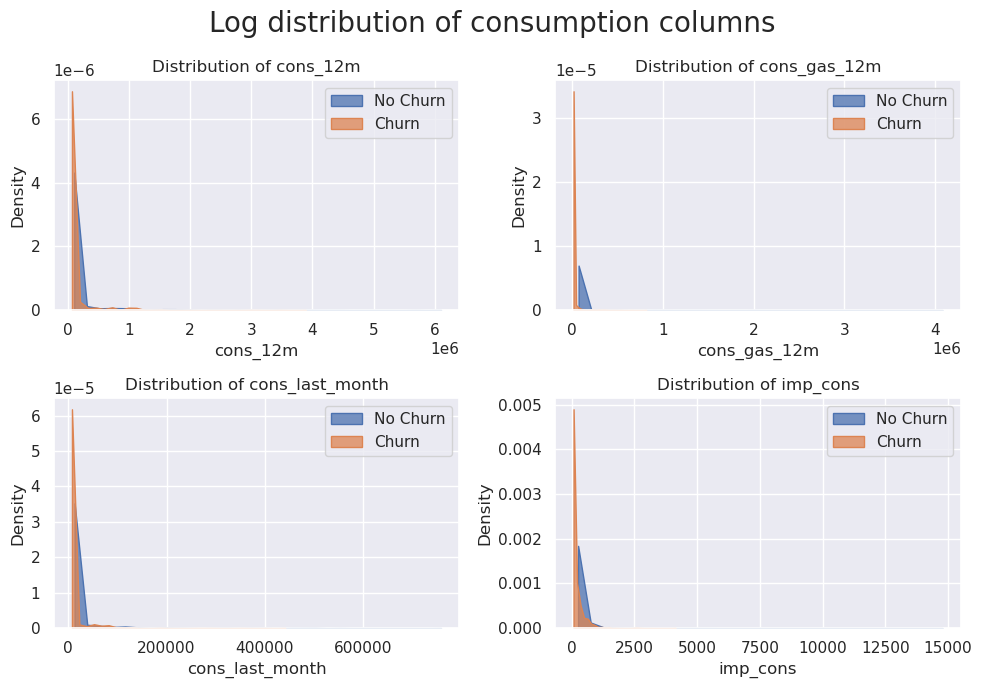

In [ ]:
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))


for i, cons in enumerate(consumption_columns):
    ax = axes[i//2, i%2]
    churn_comprison(client_df, cons, ax=ax)

plt.suptitle('Log distribution of consumption columns', fontsize=20)
plt.tight_layout()
plt.show()

> We can see that that churned clients have a lower consumption than others.

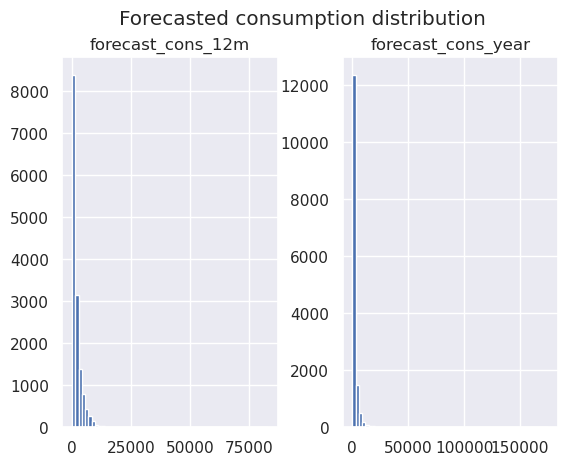

In [ ]:
forcasted_cons = ['forecast_cons_12m', 'forecast_cons_year']

plot_hist(client_df, forcasted_cons, bins_=60, title='Forecasted consumption distribution')

> As expected the ditribution of the forcasted cosumptions folow the same distribution of the consomations, and we can see that the most of the clients have a low forcasted consomation.

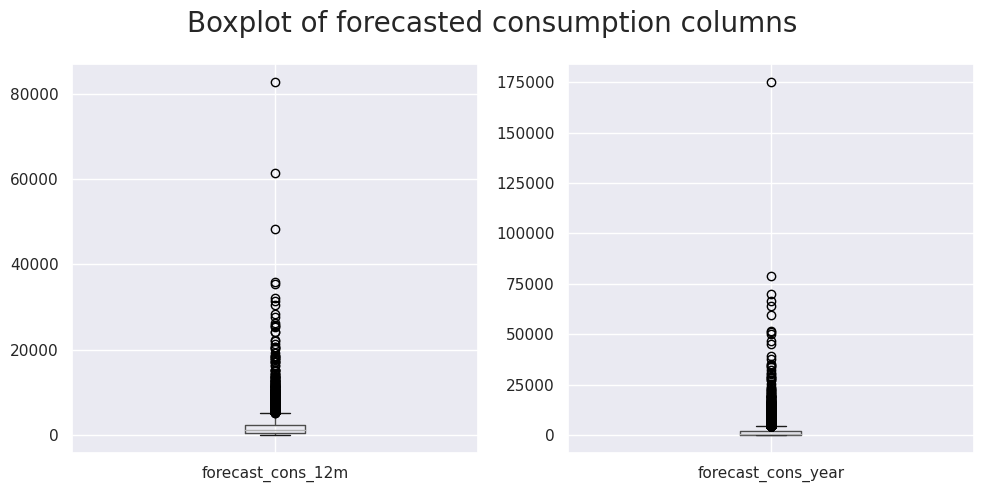

In [ ]:
fig, subplots = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

for i, cons in enumerate(forcasted_cons):
    client_df[[cons]].boxplot(ax=subplots[i])
plt.suptitle('Boxplot of forecasted consumption columns', fontsize=20)
plt.tight_layout()
plt.show()

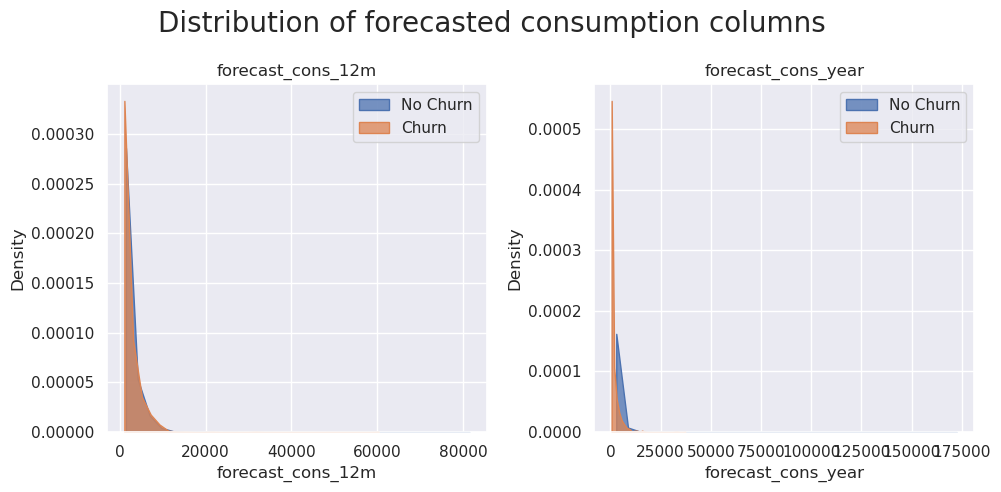

In [ ]:
figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

for i, cons in enumerate(forcasted_cons):
    churn_comprison(client_df, cons, ax=axes[i])

    axes[i].set_title(cons)

plt.suptitle('Distribution of forecasted consumption columns', fontsize=20)

plt.tight_layout()

plt.show()

> Same conclusion for the forcasted consumption columns

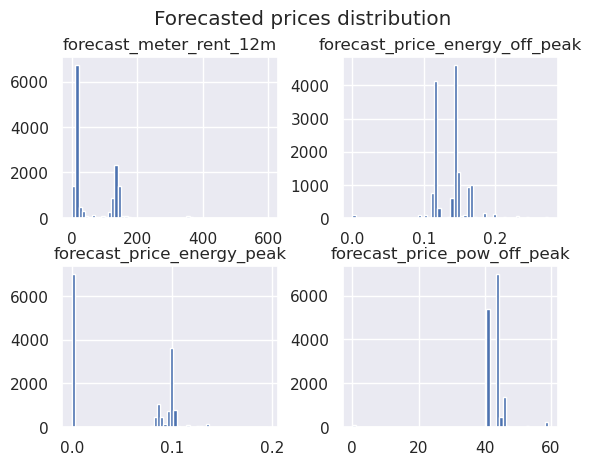

In [ ]:
forecast_prices = ['forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak']

plot_hist(client_df, forecast_prices, bins_=60, title='Forecasted prices distribution')

> We can see that we don't have a continious distribution of the prices, this can be explained by the fact that the prices are fixed and that we have different peaks.

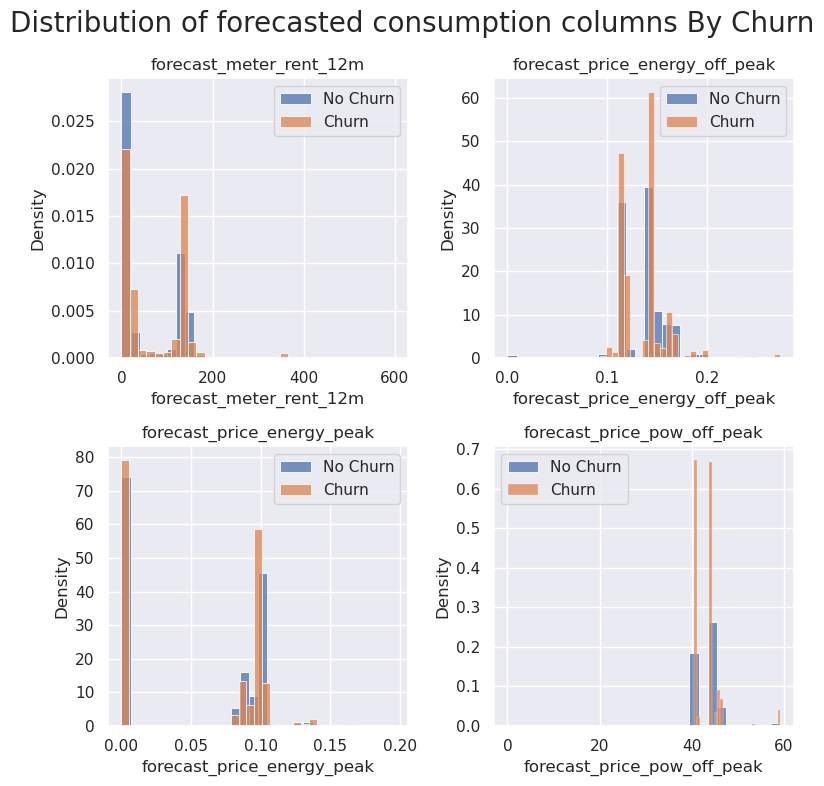

In [ ]:

figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
for i, cons in enumerate(forecast_prices):
    sns.histplot(x=client_df.loc[client_df['churn']==0][cons], stat='density', bins=30, label='No Churn', ax=axes[i//2, i%2])
    sns.histplot(x=client_df.loc[client_df['churn']==1][cons], stat='density', bins=30, label='Churn', ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(cons)
    axes[i//2, i%2].legend()
plt.suptitle('Distribution of forecasted consumption columns By Churn', fontsize=20)
plt.tight_layout()
plt.show()

> Prices seem to be a good indicator of churn, as long as consumption as we've seen before, because even if the percentage of churn is low, we see high density around specific ranges of values, compared to non-churns, which are more spread out.

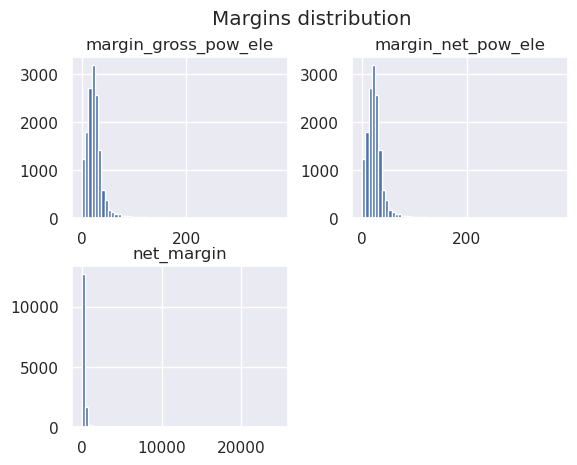

In [ ]:
margins = ['margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']

plot_hist(client_df, margins, bins_=60, title='Margins distribution')

THe margin_gross_po_ele and margin_net_pow_ele follow the same distribution, so more likely they are correlated.

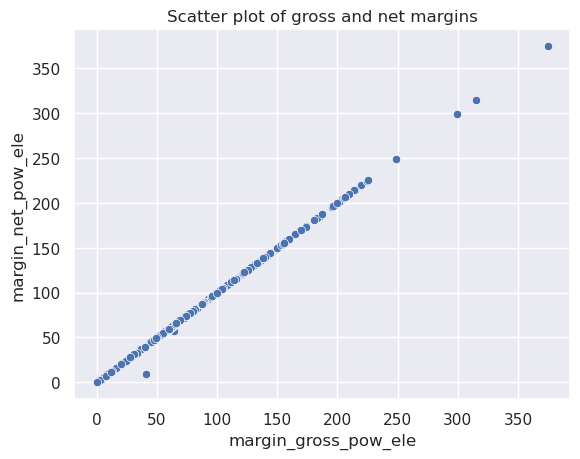

In [ ]:
sns.scatterplot(x='margin_gross_pow_ele', y='margin_net_pow_ele', data=client_df)
plt.title('Scatter plot of gross and net margins')
plt.show()

> We can confirm the correlation between the two columns, and we can see that the correlation is positive.

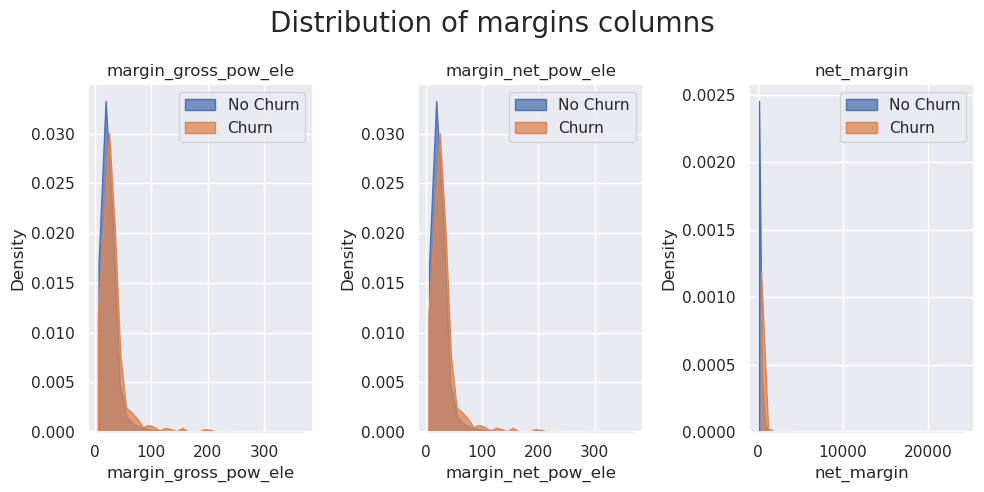

In [ ]:
figure, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,5))

for i, cons in enumerate(margins):

    churn_comprison(client_df, cons, ax=axes[i])

    axes[i].set_title(cons)

plt.suptitle('Distribution of margins columns', fontsize=20)

plt.tight_layout()

plt.show()

> - For the margin_gross_pow_ele and margin_net_pow_ele, we can see that the churn distribution and the non-churn distribution are almost the same.

>- For the net margin we can see that the less the net margin is, the more likely the client will churn, which seems logic.

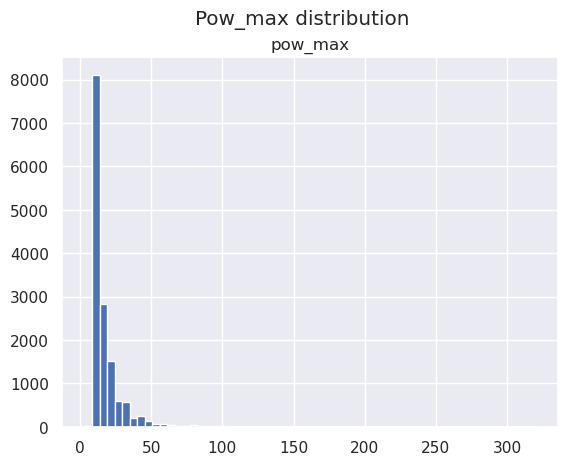

In [ ]:
plot_hist(client_df, ['pow_max'], bins_=60, title='Pow_max distribution')

> We can see that the max power is more condensed in low values.

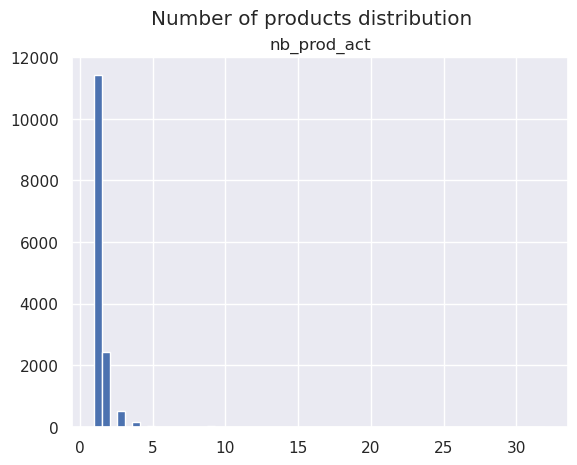

In [ ]:
plot_hist(client_df, ['nb_prod_act'], bins_=60, title='Number of products distribution')

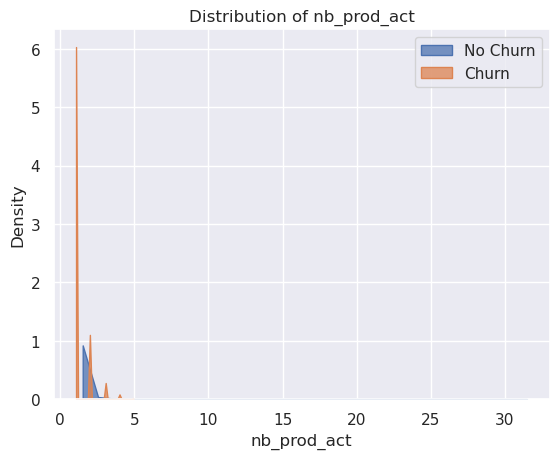

In [ ]:
churn_comprison(client_df, 'nb_prod_act')

In [ ]:
def box_plot_by_churn(dataframe, column, ax=None):
    """
    Plot variable distirbution in a histogram
    """

    if ax is None:
        ax = plt.gca()
    churned_consumption = client_df[client_df['churn'] == 1]['cons_gas_12m']
    not_churned_consumption = client_df[client_df['churn'] == 0]['cons_gas_12m']

    # Create a boxplot for comparison
    ax.boxplot([churned_consumption, not_churned_consumption], labels=['Churned', 'Not Churned'], showmeans=True)

    ax.set_xlabel(column)

    ax.set_title('Boxplot of {}'.format(column))
    

> What is surprised is that the SME that have a high consomation don't churn, so we should investigate another metric that can explain the churn of the SME clients.

In [ ]:
def date_progression(dataframe, column, ax=None):
    """
    Plot variable distirbution in a histogram
    """

    if ax is None:
        ax = plt.gca()

    # group people who churned by date
    churned_counts = client_df[client_df['churn'] == 1].groupby(column)['churn'].count().reset_index()
    # group people who did not churn by date
    non_churned_counts = client_df[client_df['churn'] == 0].groupby(column)['churn'].count().reset_index()
    sns.lineplot(data=churned_counts, x=column, y='churn', label='Churned Clients', color='blue', ax=ax)
    # sns.lineplot(data=non_churned_counts, x=column, y='churn', label='Non Churned Clients', color='orange', ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Churned Clients')
    ax.set_title('Churned Clients by {}'.format(column))
    

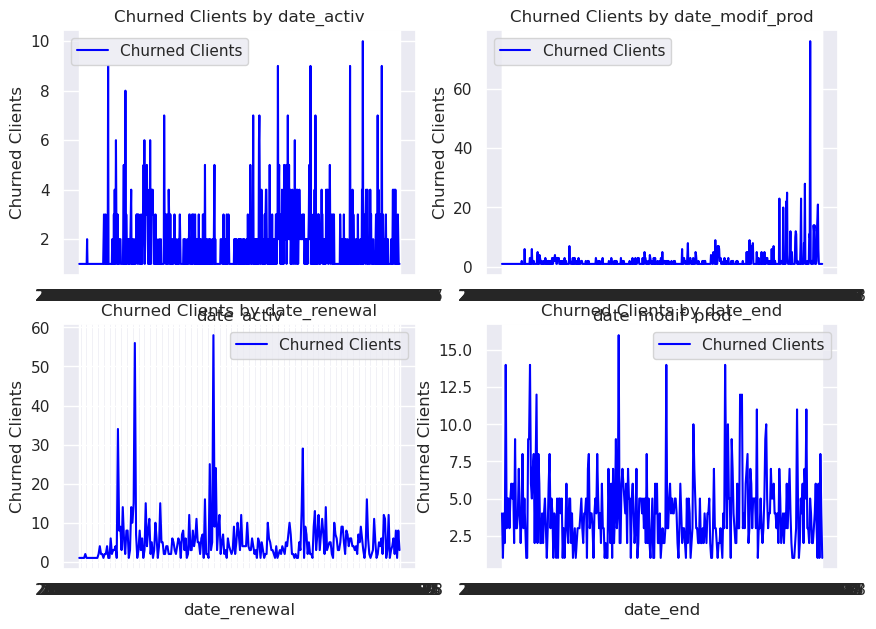

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

dates_columns = ['date_activ', 'date_modif_prod', 'date_renewal', 'date_end']



for i, date in enumerate(dates_columns):
    churned_counts = client_df.groupby(date)['churn'].sum().reset_index()
    ax = axs[i//2, i%2]
    date_progression(churned_counts, date, ax=ax)

plt.legend()

plt.show()



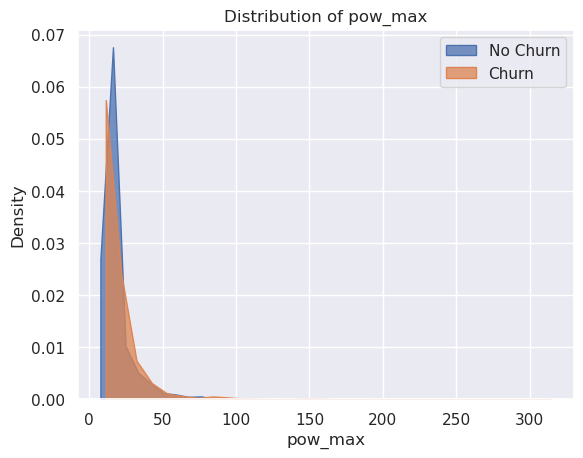

In [ ]:
churn_comprison(client_df, 'pow_max')


There seems to be a difference between the two distributions eventhough it's not huge.

These consumption variables are all very close to each others, we need to examine correlations between them.

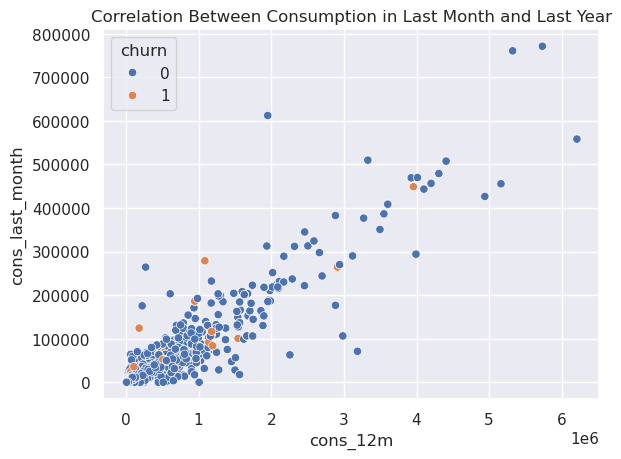

In [ ]:
sns.scatterplot(data=client_df, x='cons_12m', y='cons_last_month', hue='churn')
plt.title('Correlation Between Consumption in Last Month and Last Year')
plt.show()

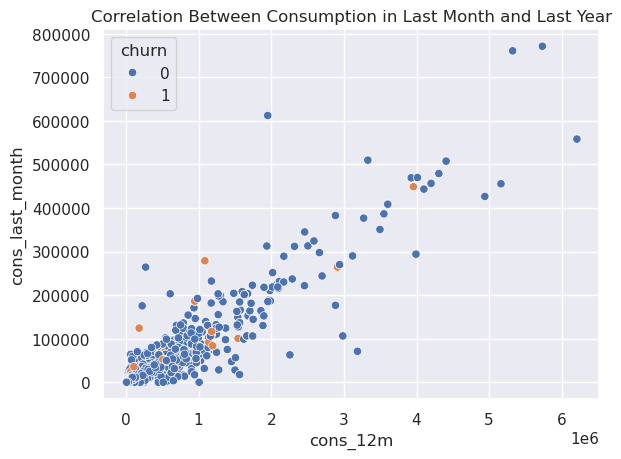

In [ ]:
sns.scatterplot(data=client_df, x='cons_12m', y='cons_last_month', hue='churn')
plt.title('Correlation Between Consumption in Last Month and Last Year')
plt.show()

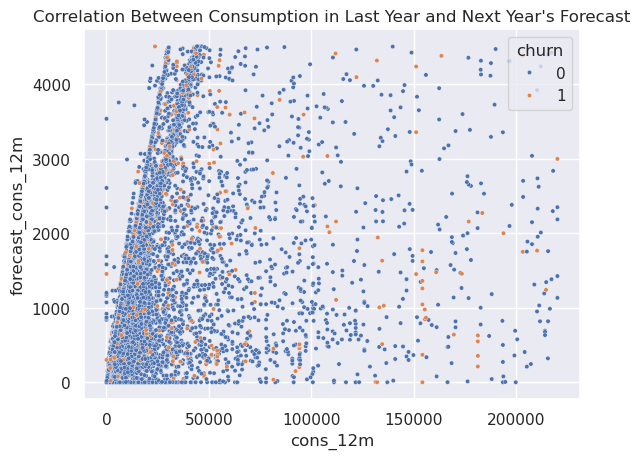

In [ ]:
sns.scatterplot(
    data=client_df.loc[(client_df['cons_12m']<client_df['cons_12m'].quantile(0.9))&(client_df['forecast_cons_12m']<client_df['forecast_cons_12m'].quantile(0.9))],
    x='cons_12m',
    y='forecast_cons_12m',
    hue='churn',
    s=10
)
plt.title('Correlation Between Consumption in Last Year and Next Year\'s Forecast')
plt.show()

> There is an apparent relationship between the past consumption and the future one.

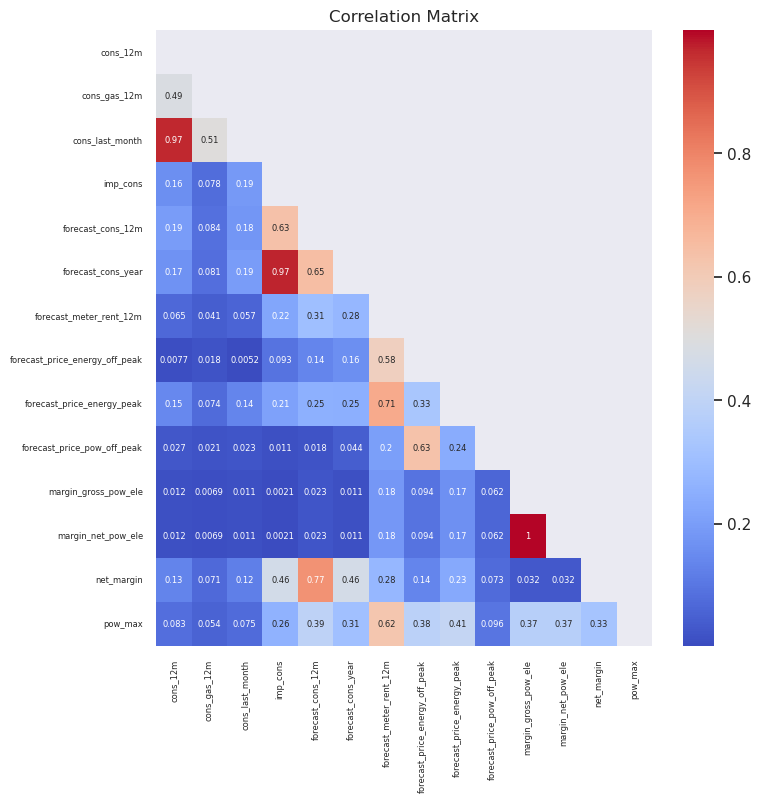

In [ ]:


numerical_columns = consumption_columns + \
    forcasted_cons + \
    forecast_prices + \
    margins + \
    ['pow_max']

corr_matrix = np.abs(client_df[numerical_columns].corr())

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(8, 8))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask, annot_kws={"fontsize":6})
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=6)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=6)
plt.title('Correlation Matrix')
plt.show()



We witness the following:

- Moderate correlation between past 12 months' gas consumption and electricity consumption.
- Strong correlation between the net margin of the SME and next calendar year's consumption.
- Strong correlation between the forecasted price of energy at peak hours forecasted bill of meter rental.
- Perfect correlation between past 12 months and last month's electricity consumption.
- Perfect correlation between current paid consumption and next calendar year's consumption.
- Perfect correlation between net and gross margins as we stated before.


In [ ]:
scatter_list = [
    ('cons_last_month', 'cons_gas_12m'),
    ('forecast_cons_year', 'imp_cons'),
    ('forecast_cons_year', 'forecast_cons_12m'),
    ('forecast_price_energy_peak', 'forecast_meter_rent_12m'),
    ('forecast_price_pow_off_peak', 'forecast_price_energy_off_peak'),
    ('net_margin', 'forecast_cons_12m'),
    ('pow_max', 'forecast_meter_rent_12m')
]

In [ ]:
def make_scatter(df, x, y):    
    sns.scatterplot(data=df, x=x, y=y, hue='churn', s=10)
    plt.tight_layout()
    plt.show()
    plt.clf()

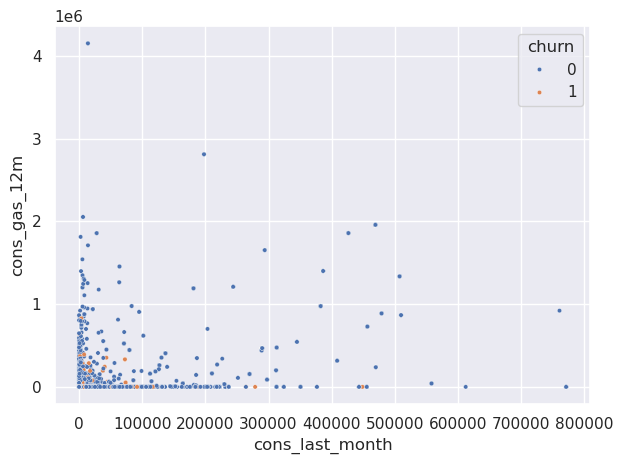

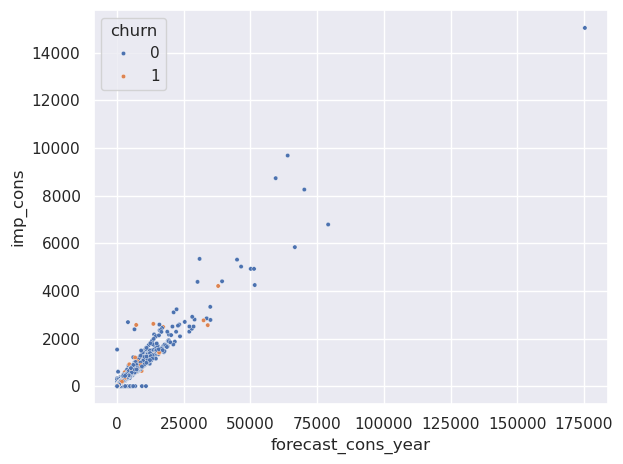

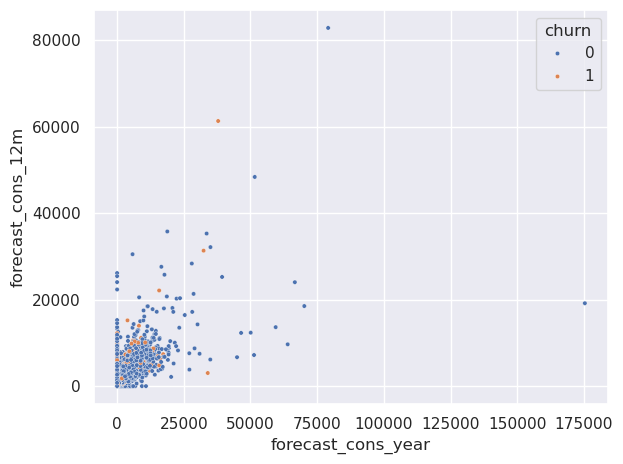

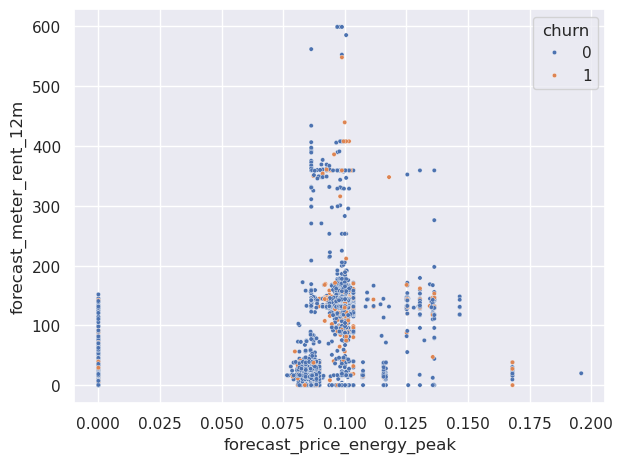

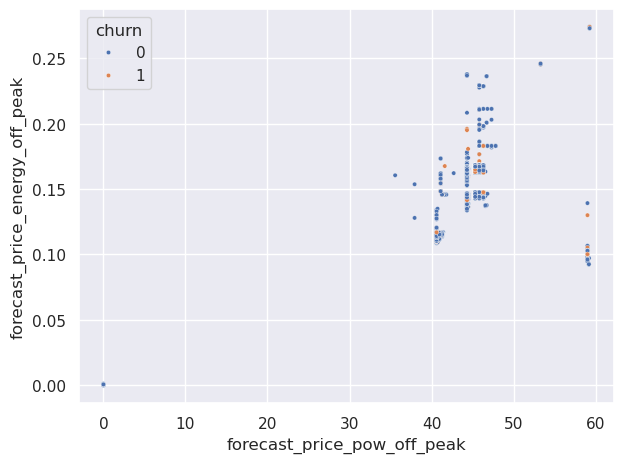

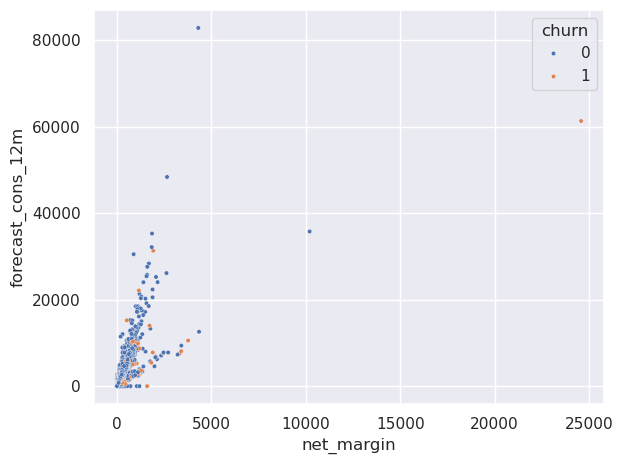

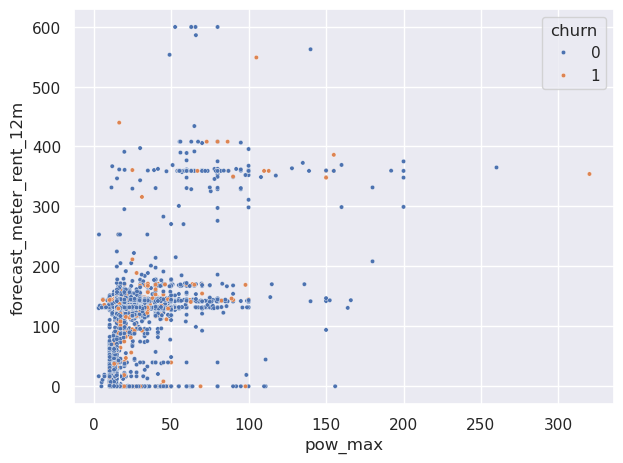

In [ ]:
for x, y in scatter_list:
    make_scatter(client_df, x, y)
plt.close()

The only correlations that matter here are between:

- current paid consumption (imp_cons) and next calendar year's consumption (forecast_cons_year).
- net margin of SME (net_margin) and next 12 months' consumption (forecast_cons_12m).
- In addition to the one we saw previously between past 12 months' consumption (cons_12m) and last month's consumption (cons_last_month).

Let's take a look at the dates, and see if there is any pattern.


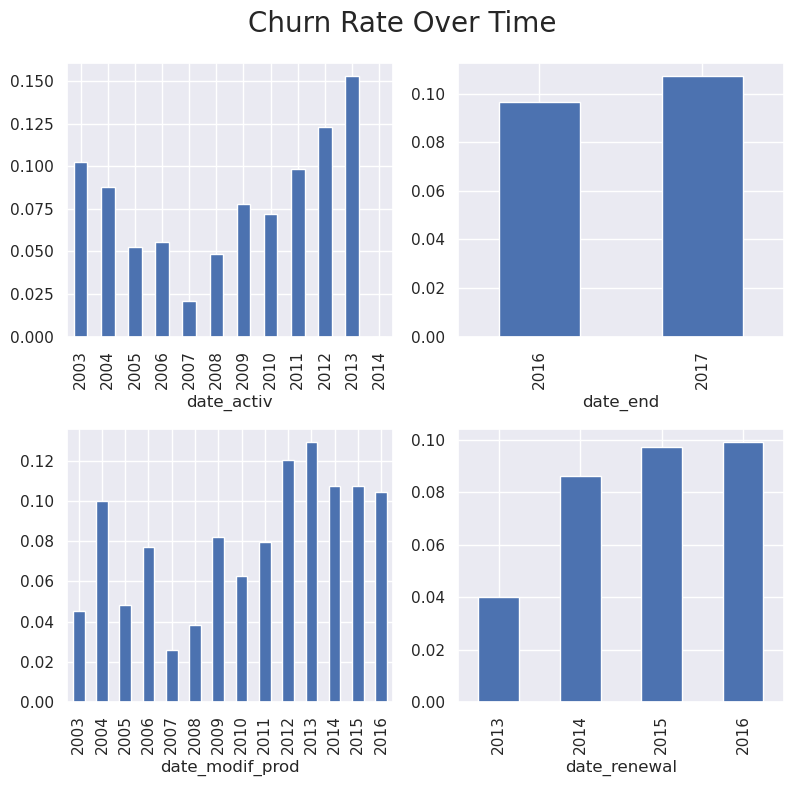

In [ ]:
dates = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']

fig, axes = plt.subplots(2, 2, figsize=(8, 8))

for i, date in enumerate(dates):
    client_df[date] = pd.to_datetime(client_df[date], format='%Y-%m-%d')
    temp_df = client_df.groupby(client_df[date].dt.year)['churn'].agg(['sum','count'])
    temp_df['churn_rate'] = temp_df['sum'] / temp_df['count']
    temp_df['churn_rate'].plot(kind='bar', ax=axes[i//2, i%2])
 
plt.suptitle('Churn Rate Over Time', fontsize=20)
plt.tight_layout()
plt.show()

- Looking at years af contracts' activation, we see that the churn rate was high and kept decreasing until 2007 at 2,5%, then it started - - - - increasing again all the way up to 15%
- The year of the end of the contract doesn't seem to have any impact on churn.
- The year of product's modification seems to follow the same pattern as the year of activation.
- Churn rate was the lowest for the most ancient years of contract's renewals.


***

Let's look at the historical data of the prices.

In [ ]:
# convert date columns to datetime
price_df['price_date'] = pd.to_datetime(price_df['price_date'], format='%Y-%m-%d')

In [ ]:
churned_clients = client_df.loc[client_df['churn']==1, 'id'].unique()
non_churned_clients = client_df.loc[client_df['churn']==0, 'id'].unique()

In [ ]:
churn_price_df = price_df.loc[price_df['id'].isin(churned_clients)]
non_churn_price_df = price_df.loc[price_df['id'].isin(non_churned_clients)]

In [ ]:
def plot_price_over_time(col, period, figname):
    fig = plt.figure(figsize=(10,8))
    gs = GridSpec(2, 2, figure=fig)

    ax1 = fig.add_subplot(gs[0, :])
    ax2 = fig.add_subplot(gs[1, 0])
    ax3 = fig.add_subplot(gs[1, 1], sharey=ax2)

    price_df.groupby('price_date')[col].mean().plot(ax=ax1, xlabel='')
    ax1.set_title(f'Average Price Over Time ({period} period)')

    churn_price_df.groupby('price_date')[col].mean().plot(label='Churned', ax=ax2, xlabel='')
    ax2.set_title('Churned')

    non_churn_price_df.groupby('price_date')[col].mean().plot(label='Non-churned', ax=ax3, xlabel='')
    ax3.set_title('Non-churned')

    plt.tight_layout()
    plt.show()

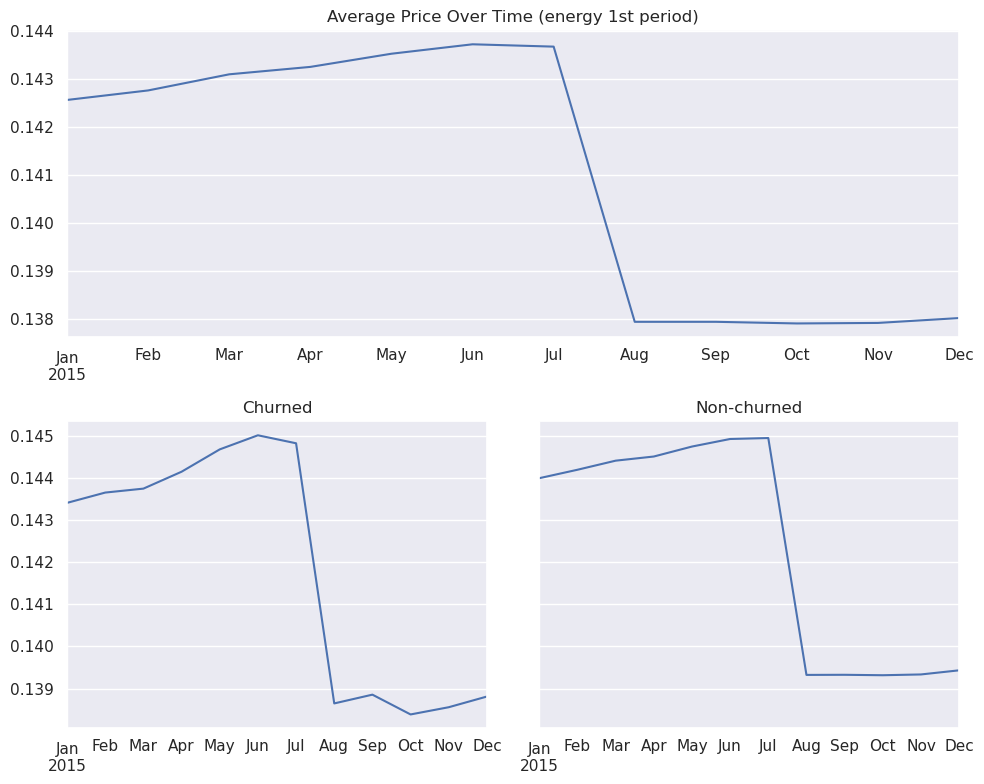

In [ ]:
plot_price_over_time('price_off_peak_var', 'energy 1st', 'price_1st_period_over_time')

We notice the same pattern for price evolution for both churns and non-churns:

- Prices were increasing from the beginning until the mid of 2015, then there is a sudden drop, from which they remain constant.

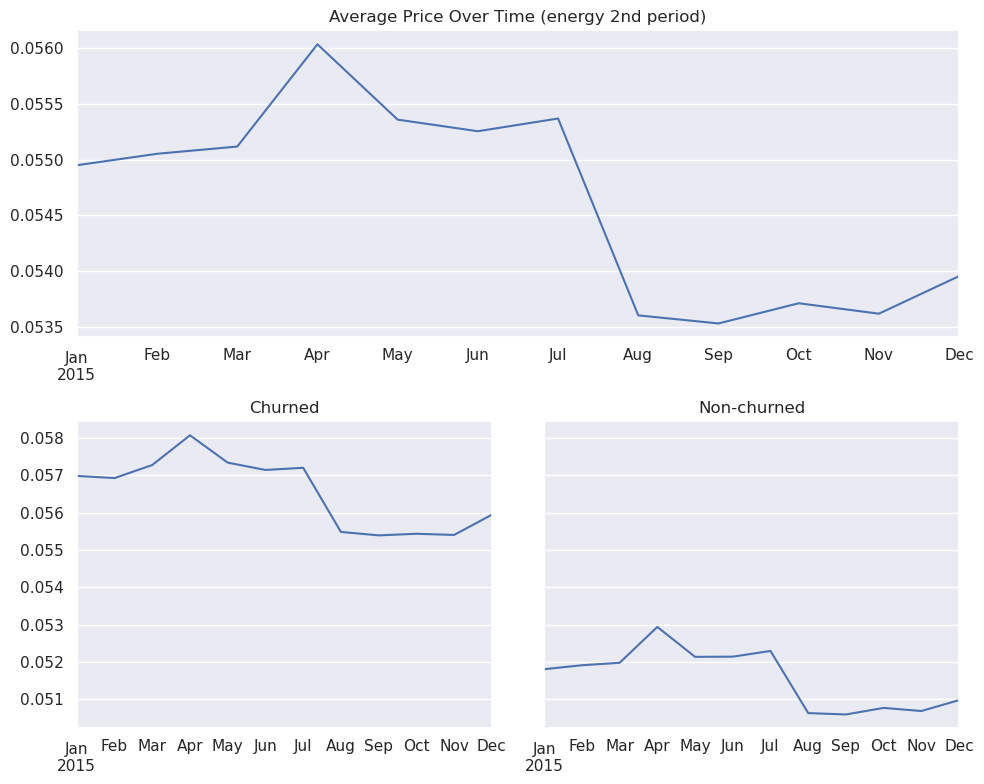

In [ ]:
plot_price_over_time('price_peak_var', 'energy 2nd', 'price_2nd_period_over_time')

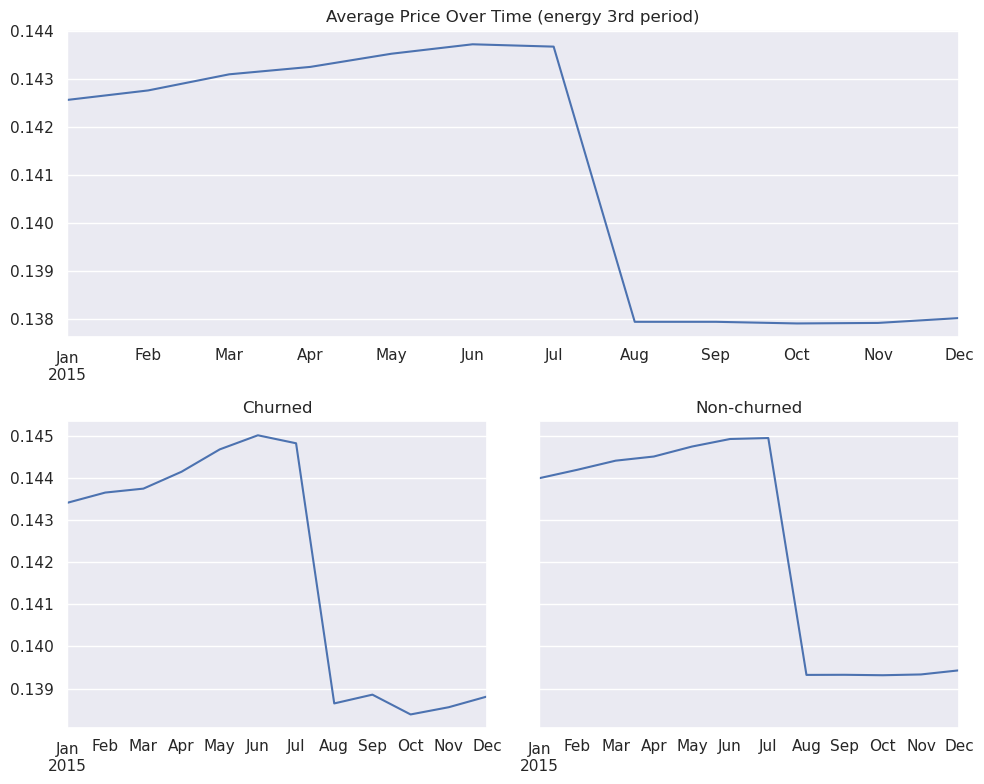

In [ ]:
plot_price_over_time('price_off_peak_var', 'energy 3rd', 'price_3rd_period_over_time')

These evolutions are very similar for both churns and non-churns, but when we look at the evolutions of prices at the second period, we see that churn prices are way higher than non-churns. This could indicate that prices at the second period are a better indicator of churn.


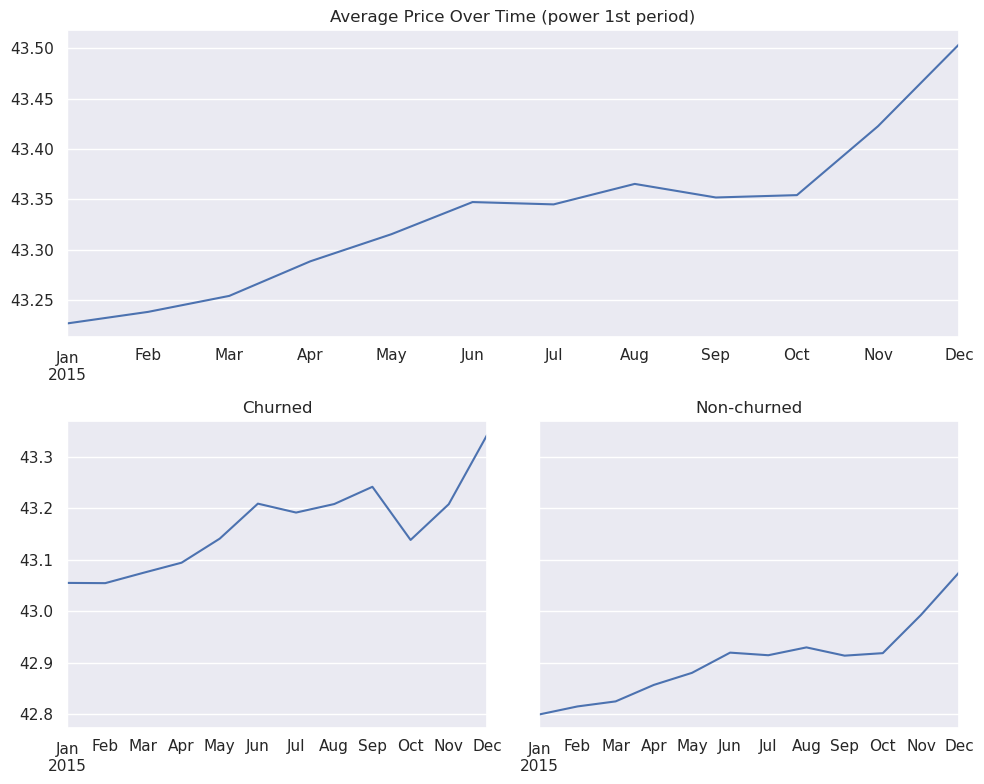

In [ ]:
plot_price_over_time('price_off_peak_fix', 'power 1st', 'price_1st_fixed_period_over_time')

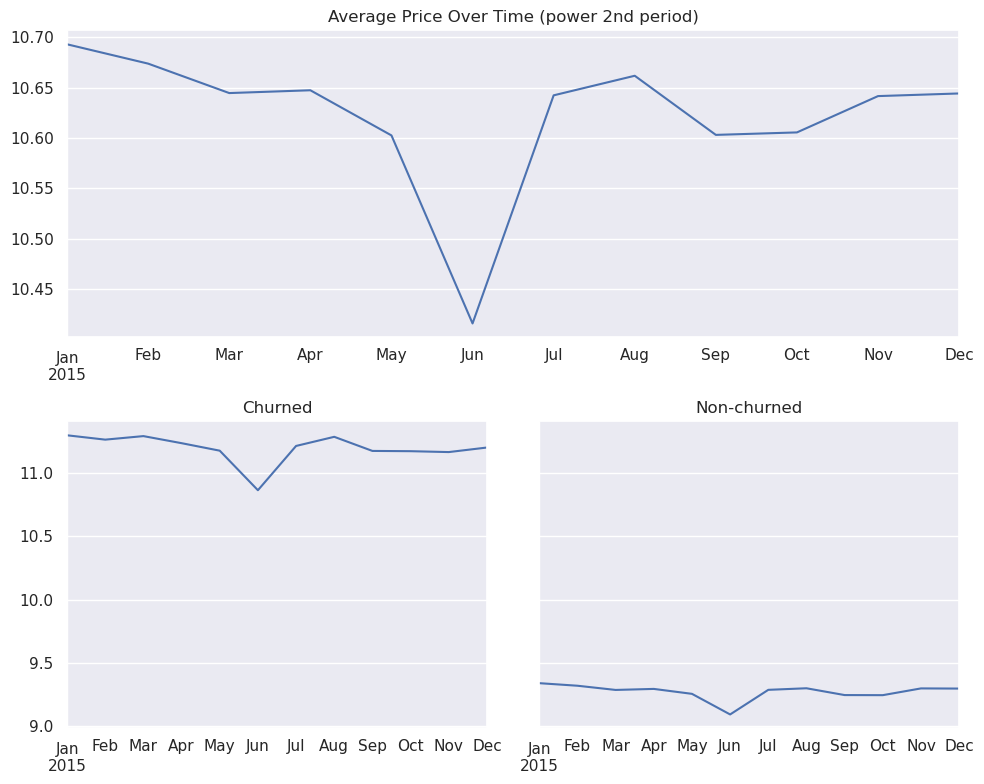

In [ ]:
plot_price_over_time('price_peak_fix', 'power 2nd', 'price_2nd_fixed_period_over_time')

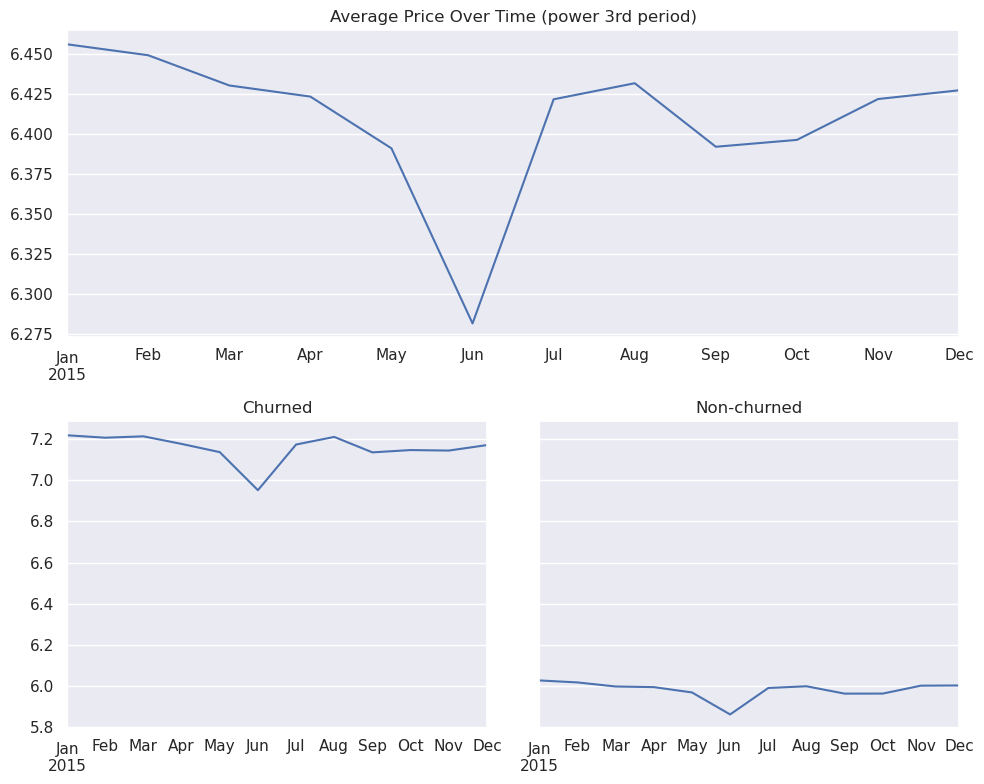

In [ ]:
plot_price_over_time('price_mid_peak_fix', 'power 3rd', 'price_3rd_fixed_period_over_time')

We see a better distinction when we look at the difference between power prices between churns and non-churns.
For all the periods, churns prices are a lot higher, and this indicates that indeed price is a key indicator of churn.

We need to include this information about price changes in the first dataset, that will be used for modeling.
For this, what we can do is to create a new column that indicates the average price for each client at the year 2015 (which in this case is the last calendar year), and in case there are clients which historical prices were not recorded, we will use the average price for their category (churn or non-churn).


In [ ]:
price_last_year_df = price_df[['id', 'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']].groupby('id').mean().reset_index()

In [ ]:
client_price_df = pd.merge(client_df, price_last_year_df, on='id', how='left')

In [ ]:
client_price_df = pd.merge(client_df, price_last_year_df, on='id', how='left')

In [ ]:
# export to csv

client_price_df.to_csv('./../data/client_price_df.csv', index=False)

In [ ]:
# random forest using 